### Machine learning model to detect fraudulent transactions using a Kaggle dataset, with a focus on data handling, model training, evaluation, and explainability

###### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , roc_auc_score , roc_curve as sk_roc_curve,accuracy_score , precision_recall_curve , confusion_matrix, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb

### Step 1. Data Exploration and Preprocessing


### 1.a. Data exploration

In [2]:
#Read the data
data = pd.read_csv("card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
#info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
#summary statics
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
#check for duplicate values
data.duplicated().sum()

0

The Data don't Have any missing values or any Dublicate value

In [7]:
#Distribition of Numeric Features
num_features = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


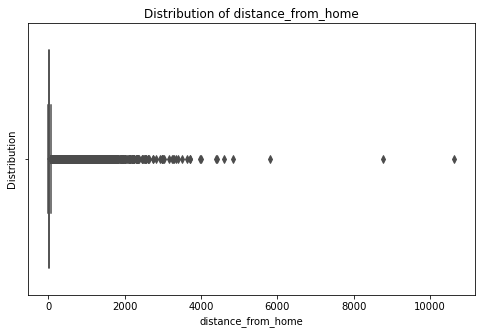

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


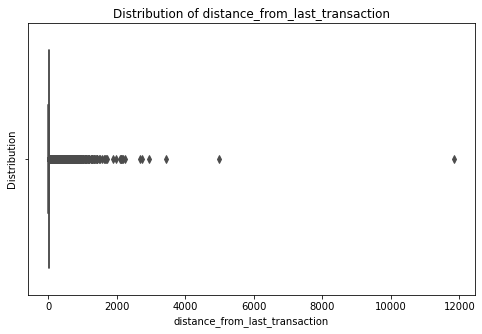

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


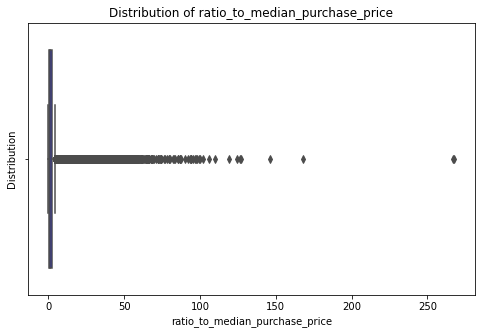

In [8]:
#analysis of numeric feature
for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.show()

In [9]:
#removing the rows with the largest 5 values
for col in num_features:
    # Find the indices of the largest 5 values
    largest_indices = data[col].nlargest(5).index
    
    # Drop these rows from the DataFrame
    data = data.drop(largest_indices)

# Reset the index after dropping rows
data = data.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


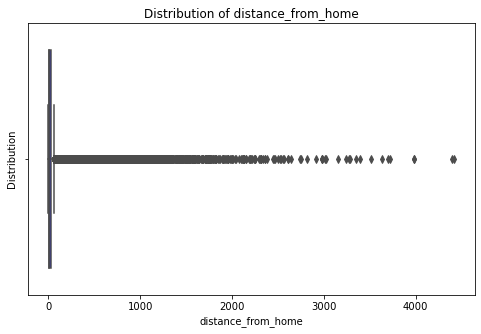

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


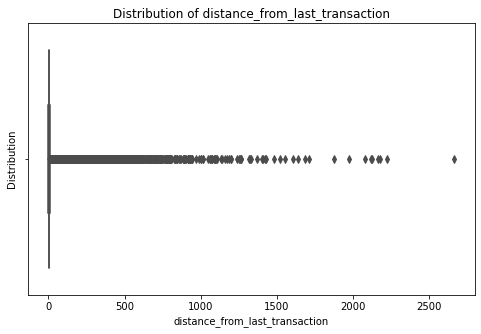

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


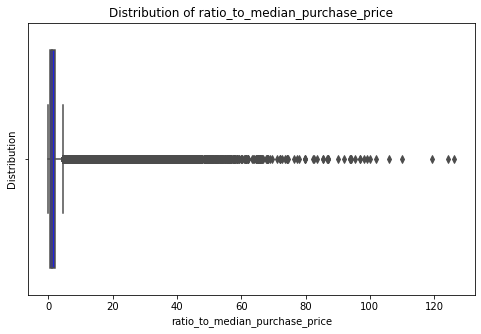

In [10]:
for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.show()

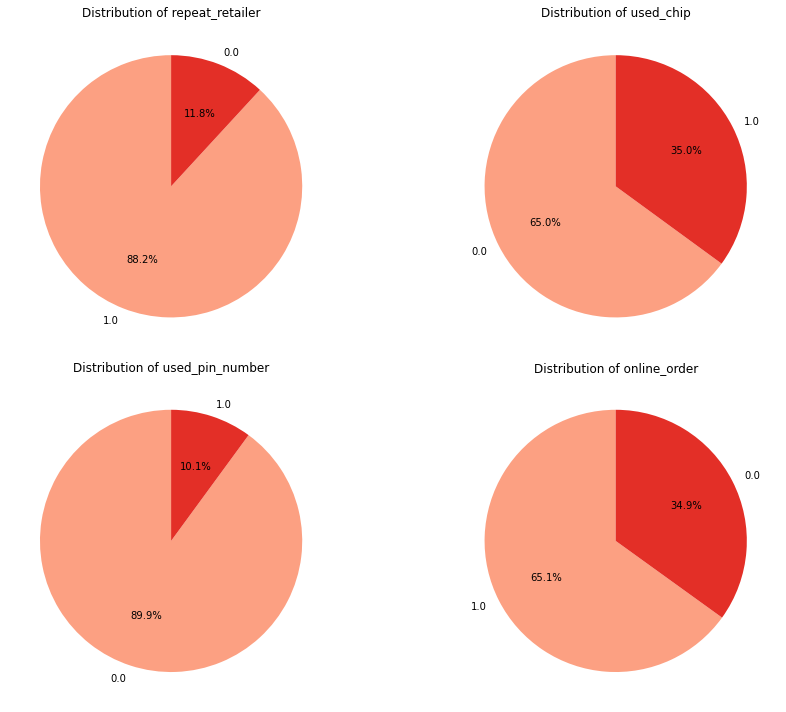

In [11]:
#Analysis of categorical features
cat_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot pie charts for each categorical feature
for i, col in enumerate(cat_features):
    value_counts = data[col].value_counts()
    axes[i].pie(value_counts,
                labels=value_counts.index,
                autopct='%1.1f%%',
                colors=sns.color_palette('Reds', n_colors=len(value_counts)),
                startangle=90)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

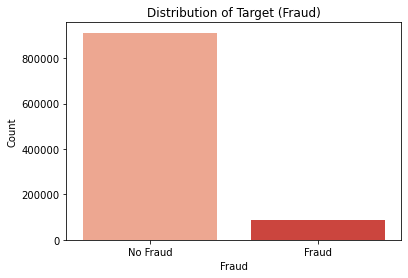

In [12]:
#Target Distribition
sns.countplot(data=data, x="fraud", palette="Reds")
plt.title("Distribution of Target (Fraud)")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Fraud", "Fraud"])
plt.show()

### Features Correlation with Target

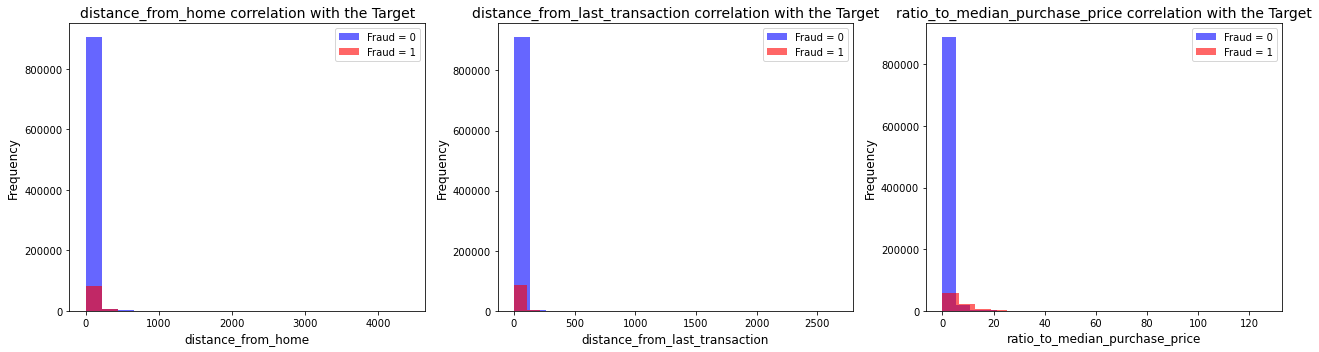

In [13]:
data['fraud'] = data['fraud'].astype(int)
# Fix for histogram color indexing
colors = {0: 'blue', 1: 'red'}  # Define colors for each target class
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each numerical feature and plot the histogram
for i, col in enumerate(num_features):
    for fraud_value in data['fraud'].unique():
        subset = data[data['fraud'] == fraud_value]
        axes[i].hist(subset[col], bins=20, alpha=0.6, label=f'Fraud = {fraud_value}', color=colors[fraud_value])
    axes[i].set_title(f'{col} correlation with the Target', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend()

plt.tight_layout()
plt.show()


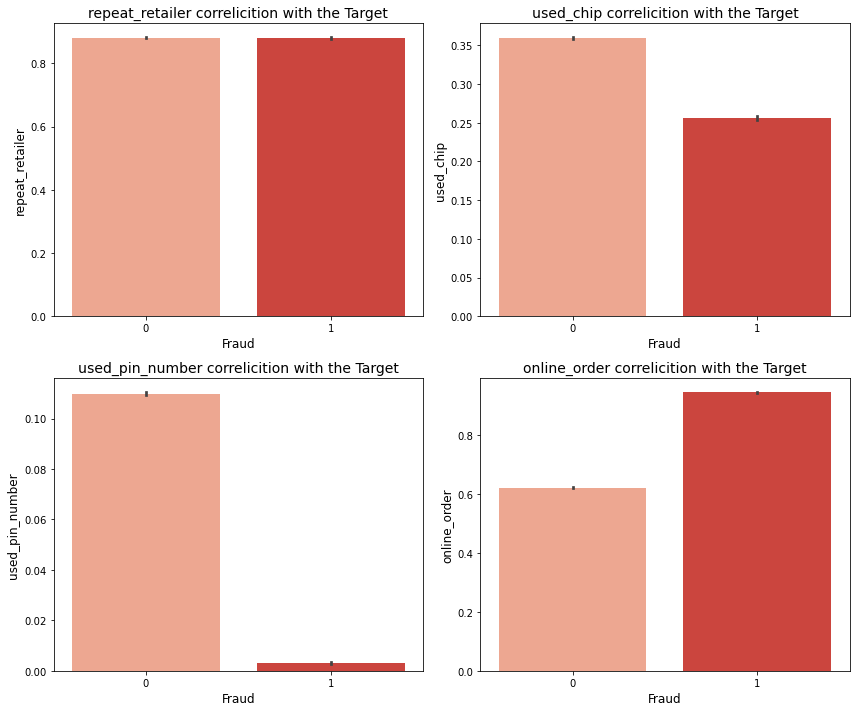

In [78]:
# Categorical Features correlicition with the Target
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each Categorical feature and plot the correlation with the target
for i, col in enumerate(cat_features):
    sns.barplot(data=data, x="fraud", y=col, ax=axes[i], palette="Reds")
    axes[i].set_title(f'{col} correlicition with the Target', fontsize=14)
    axes[i].set_xlabel('Fraud', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

<AxesSubplot:>

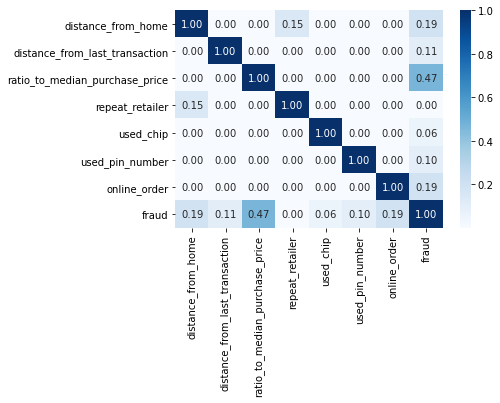

In [15]:
sns.heatmap(data.corr().abs() ,annot=True , fmt=".2f" , cmap="Blues")

All Features Have A correlition with The Target except for repeat_retailer

### 1.b Data Spiliting and Preprocessing

In [16]:
#declare the featues and target
x = data.drop(columns=["fraud"])
y = data["fraud"] 

In [79]:
#split the data
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [18]:
#preprocessing
std = StandardScaler()
xtrain = std.fit_transform(xtrain)
xtest = std.transform(xtest)

#### Examine Class Distribution

In [19]:
#counting the number of instances 
print(data['fraud'].value_counts())

fraud
0    912586
1     87399
Name: count, dtype: int64


In [20]:
#calculating the percentage of each class
print(data['fraud'].value_counts(normalize=True) * 100)

fraud
0    91.259969
1     8.740031
Name: proportion, dtype: float64


In [21]:
#calculating the imbalnace ratio
counts = data['fraud'].value_counts()
imbalance_ratio = counts[0] / counts[1]  # Majority class count / Minority class count
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 10.44


To handle a class imbalance with an imbalance ratio of 10.4, you can use class weights to train your machine learning model

In [80]:
# Calculate the class distribution
class_counts = y_train.value_counts()
print("Class distribution in training set:")
print(class_counts)

# Calculate class weights manually (optional)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("\nClass Weights:", class_weight_dict)

Class distribution in training set:
fraud
0    638810
1     61179
Name: count, dtype: int64

Class Weights: {0: 0.5478851301638985, 1: 5.720827408097549}


# 2. Model Development (Supervised)

### 2.a Train a Baseline Model (Logistic Regression)

In [81]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Performance metrics for Logistic Regression
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance Metrics:
Accuracy: 0.93
Precision: 0.58
Recall: 0.95
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    136888
           1       0.58      0.95      0.72     13110

    accuracy                           0.93    149998
   macro avg       0.79      0.94      0.84    149998
weighted avg       0.96      0.93      0.94    149998



### 2.b. XGBoost model

In [82]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weight_dict[1] / class_weight_dict[0])

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Performance metrics for XGBoost
print("XGBoost Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance Metrics:
Accuracy: 1.00
Precision: 0.98
Recall: 1.00
F1-Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136888
           1       0.98      1.00      0.99     13110

    accuracy                           1.00    149998
   macro avg       0.99      1.00      0.99    149998
weighted avg       1.00      1.00      1.00    149998



 Trains an XGBoost model with enhanced regularization to mitigate overfitting.
- The dataset is split into training, validation, and test sets (70%, 15%, 15%).
- Data is converted to DMatrix for optimized processing by XGBoost.
- Model parameters include adjustments for regularization (e.g., reg_alpha, reg_lambda) and tree depth.
- Early stopping is used during training to avoid overfitting by monitoring validation performance.
- Predictions are made on the test set, and performance metrics (confusion matrix, classification report) are evaluated.
- The distribution of prediction probabilities is also analyzed to check prediction quality.

In [40]:
# Convert data into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters with enhanced regularization
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.01,       # Lower learning rate
    'max_depth': 4,             # Further reduced tree depth
    'min_child_weight': 5,      # Stricter minimum samples per leaf
    'subsample': 0.7,           # Reduce subsample to increase randomness
    'colsample_bytree': 0.7,    # Reduce column sampling
    'reg_alpha': 2,             # Increase L1 regularization
    'reg_lambda': 15,           # Increase L2 regularization
    'random_state': 42
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=20, verbose_eval=10)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Performance Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check prediction probabilities
print("\nPrediction Probabilities Distribution:")
print(pd.Series(y_pred_prob).describe())

[0]	train-logloss:0.31648	eval-logloss:0.31651
[10]	train-logloss:0.28938	eval-logloss:0.28938
[20]	train-logloss:0.26983	eval-logloss:0.26979
[30]	train-logloss:0.24482	eval-logloss:0.24477
[40]	train-logloss:0.22786	eval-logloss:0.22780
[50]	train-logloss:0.21280	eval-logloss:0.21274
[60]	train-logloss:0.20080	eval-logloss:0.20068
[70]	train-logloss:0.18672	eval-logloss:0.18661
[80]	train-logloss:0.17442	eval-logloss:0.17435
[90]	train-logloss:0.16594	eval-logloss:0.16586
[100]	train-logloss:0.15415	eval-logloss:0.15412
[110]	train-logloss:0.14445	eval-logloss:0.14443
[120]	train-logloss:0.13485	eval-logloss:0.13484
[130]	train-logloss:0.12599	eval-logloss:0.12597
[140]	train-logloss:0.12000	eval-logloss:0.12000
[150]	train-logloss:0.11298	eval-logloss:0.11295
[160]	train-logloss:0.10678	eval-logloss:0.10676
[170]	train-logloss:0.10139	eval-logloss:0.10136
[180]	train-logloss:0.09601	eval-logloss:0.09598
[190]	train-logloss:0.09214	eval-logloss:0.09213
[200]	train-logloss:0.08834	eva

Note: XGBoost achieved an accuracy of 1 even after applying techniques to mitigate overfitting. 
To validate the results and explore an alternative, the CatBoost model was tested for comparison.


In [52]:
from catboost import CatBoostClassifier

# CatBoost Model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=7,
    random_seed=42,
    class_weights=[0.55, 5.70],  # Adjust weights for imbalance
    verbose=50  # To display training progress
)

# Train the Model
cat_model.fit(X_train, y_train)

# Predictions
y_pred_cat = cat_model.predict(X_test)
y_pred_prob_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))

roc_auc_cat = roc_auc_score(y_test, y_pred_prob_cat)
print(f"\nCatBoost ROC-AUC Score: {roc_auc_cat:.2f}")

0:	learn: 0.5140029	total: 853ms	remaining: 7m 5s
50:	learn: 0.0044324	total: 6.47s	remaining: 56.9s
100:	learn: 0.0041328	total: 11.5s	remaining: 45.4s
150:	learn: 0.0040327	total: 16.4s	remaining: 38s
200:	learn: 0.0040136	total: 21s	remaining: 31.2s
250:	learn: 0.0039810	total: 25.6s	remaining: 25.4s
300:	learn: 0.0039490	total: 30.5s	remaining: 20.1s
350:	learn: 0.0039454	total: 35s	remaining: 14.8s
400:	learn: 0.0039454	total: 39.3s	remaining: 9.71s
450:	learn: 0.0039454	total: 43.6s	remaining: 4.73s
499:	learn: 0.0039454	total: 48.1s	remaining: 0us

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136888
           1       0.98      1.00      0.99     13110

    accuracy                           1.00    149998
   macro avg       0.99      1.00      0.99    149998
weighted avg       1.00      1.00      1.00    149998


Confusion Matrix:
[[136590    298]
 [     0  13110]]

CatBoost ROC-AUC Score: 

# Step 3: Unsupervised Learning

### 3.a. Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# # Load dataset (replace with your data)
# X = data.drop(columns=['fraud'])  # Exclude the target column

# Train Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Approx. proportion of anomalies
    random_state=42
)
iso_forest.fit(x)

# Predict anomalies (-1 = anomaly, 1 = normal)
data['anomaly_score'] = iso_forest.decision_function(x)
data['anomaly'] = iso_forest.predict(x)

# Map results to 0 and 1 for consistency
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# Evaluate performance if ground truth is available
if 'fraud' in data.columns:
    print("\nConfusion Matrix:")
    print(confusion_matrix(data['fraud'], data['anomaly']))

    print("\nClassification Report:")
    print(classification_report(data['fraud'], data['anomaly']))
else:
    print("Top anomalies detected:")
    print(data[data['anomaly'] == 1].head())


Confusion Matrix:
[[904709   7877]
 [ 85277   2122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    912586
           1       0.21      0.02      0.04     87399

    accuracy                           0.91    999985
   macro avg       0.56      0.51      0.50    999985
weighted avg       0.85      0.91      0.87    999985



# Step 4.Model Evaluation

In [69]:
# Logistic Regression Evaluation
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_score(ytest, y_pred_lr):.2f}")
print(f"Precision: {precision_score(ytest, y_pred_lr):.2f}")
print(f"Recall: {recall_score(ytest, y_pred_lr):.2f}")
print(f"F1-Score: {f1_score(ytest, y_pred_lr):.2f}")
print("\nClassification Report:")
print(classification_report(ytest, y_pred_lr))

# XGBoost Evaluation
print("XGBoost Performance Metrics:")
print(f"Accuracy: {accuracy_score(ytest, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(ytest, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(ytest, y_pred_xgb):.2f}")
print(f"F1-Score: {f1_score(ytest, y_pred_xgb):.2f}")
print("\nClassification Report:")
print(classification_report(ytest, y_pred_xgb))

# Confusion Matrices for All Models
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_lr))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_xgb))

Logistic Regression Performance Metrics:
Accuracy: 0.93
Precision: 0.57
Recall: 0.95
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    182724
           1       0.57      0.95      0.72     17273

    accuracy                           0.93    199997
   macro avg       0.78      0.94      0.84    199997
weighted avg       0.96      0.93      0.94    199997

XGBoost Performance Metrics:
Accuracy: 1.00
Precision: 0.98
Recall: 1.00
F1-Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182724
           1       0.98      1.00      0.99     17273

    accuracy                           1.00    199997
   macro avg       0.99      1.00      0.99    199997
weighted avg       1.00      1.00      1.00    199997


Logistic Regression Confusion Matrix:
[[170574  12150]
 [   867  16406]]

XGBoost Confusion Matrix:
[[182355 

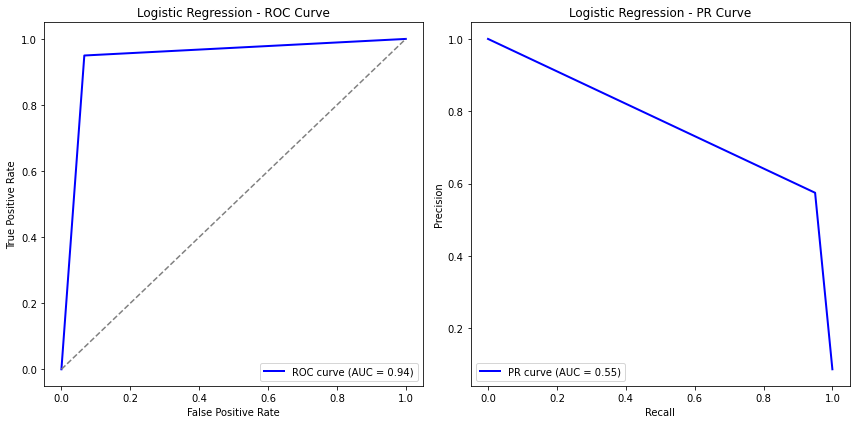

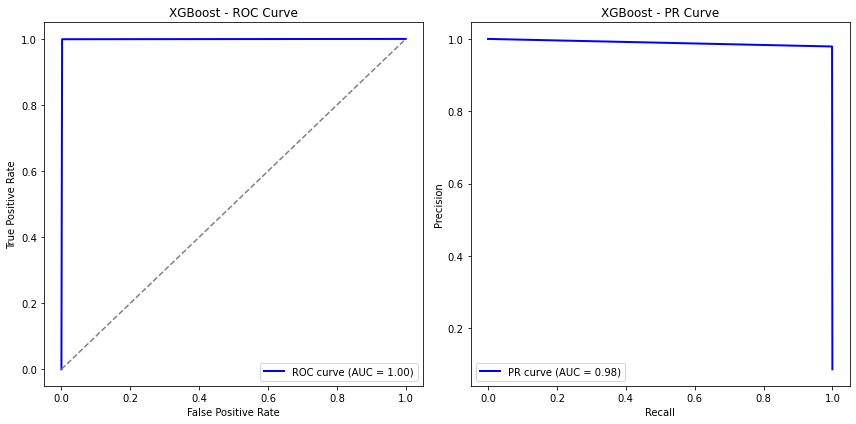

In [72]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Function to plot ROC and PR Curves
def plot_roc_pr_curves(y_true, y_pred_prob, model_name):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # PR Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    pr_auc = average_precision_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    
    # PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.title(f'{model_name} - PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()

# Plot ROC and PR curves for each model
plot_roc_pr_curves(ytest, y_pred_lr, 'Logistic Regression')
plot_roc_pr_curves(ytest, y_pred_xgb, 'XGBoost')

# Step 5. Basic Explainability

<Figure size 720x432 with 0 Axes>

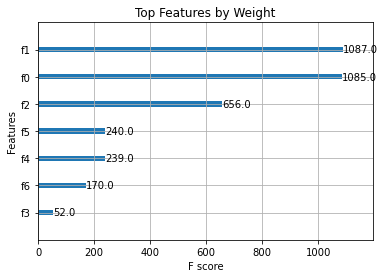

100%|===================| 699780/699989 [24:16<00:00]        

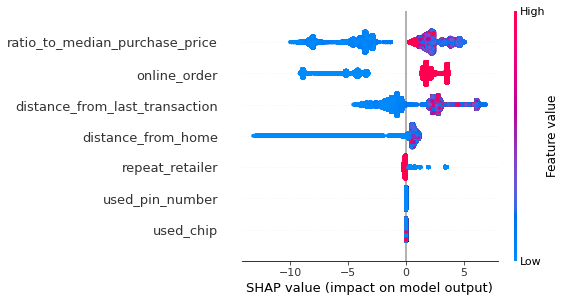

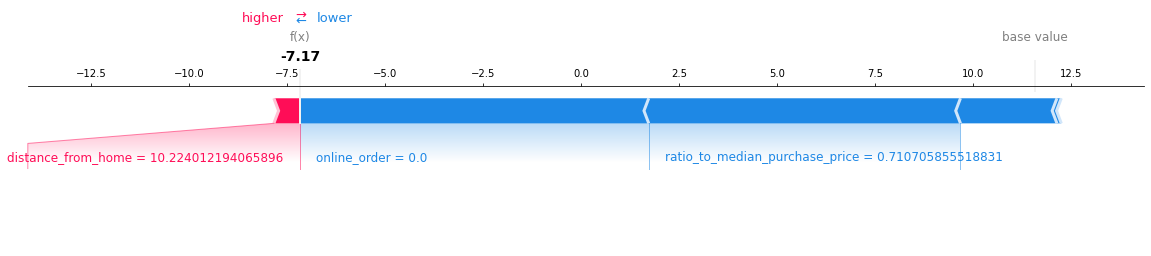

Top features impacting fraud classification based on feature importance and SHAP analysis.


In [77]:
import shap

# Train XGBoost model (assuming it's already trained and named `xgb_model`)
# Example:
# xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

# 1. Extract and visualize feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type="weight", title="Top Features by Weight")
plt.show()

# 2. SHAP for interpretability
# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# 3. Global interpretability: Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train)
plt.show()

# 4. Local interpretability: Explain individual prediction
# Pick a specific sample (e.g., index 0)
sample_index = 0
sample_data = X_train.iloc[sample_index]
shap.force_plot(explainer.expected_value, shap_values[sample_index].values, sample_data, matplotlib=True)

# Deliver results
print("Top features impacting fraud classification based on feature importance and SHAP analysis.")